### implementing simple chatbot using langGraph 

In [ ]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API")


In [62]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-120b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content='Hey Krish! That’s awesome—cricket is such a thrilling sport. Do you have a favorite team or player? What role do you usually play on the field (batsman, bowler, all‑rounder, wicket‑keeper)? I’d love to hear more about your cricket adventures!', additional_kwargs={'reasoning_content': 'The user says "Hey I am Krish and i like to play cricket". Likely they are just stating something, maybe want a response. The assistant should respond politely, maybe ask about cricket, etc. No disallowed content. Should be friendly.'}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 82, 'total_tokens': 205, 'completion_time': 0.26920999, 'prompt_time': 0.006292773, 'queue_time': 1.5029357970000001, 'total_time': 0.275502763}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_ed9190d8b7', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6f62b5f4-1063-4158-9f2e-670c289299ee-0', usage_metadata={'input_tokens': 82,

#### we will start with creating Nodes 

In [63]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

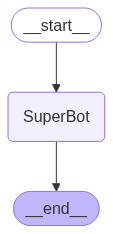

In [64]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

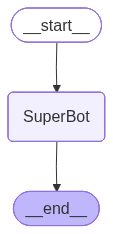

In [65]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [68]:
## invocation 
from rich import print
print(graph_builder.invoke({"messages":"hi, my name is krish and i like cricket"}))

{
    'messages': [
        HumanMessage(
            content='hi, my name is krish and i like cricket',
            additional_kwargs={},
            response_metadata={},
            id='80bcedee-54c0-43e0-8b9f-66642cde63e3'
        ),
        AIMessage(
            content="Hey Krish! 👋 Nice to meet you.  \n\nCricket’s such a fun sport—whether you’re into the 
fast‑paced thrill of T20s, the strategic depth of Test matches, or the classic drama of ODIs. Do you have a 
favorite format, team, or player you follow? I'd love to hear what you enjoy most about the game!",
            additional_kwargs={
                'reasoning_content': 'The user says hi, introduces themselves. The assistant should respond 
friendly, ask about cricket preferences, maybe ask what they like about cricket, etc. No disallowed content. So 
just respond.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 123,
                    'prompt_tokens': 82,
                    'total_tokens': 205,
                    'completion_time': 0.262208446,
                    'prompt_time': 0.006745959,
                    'queue_time': 5.737115898,
                    'total_time': 0.268954405
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--46048141-a36f-43c4-a932-bb5bf63aaafa-0',
            usage_metadata={'input_tokens': 82, 'output_tokens': 123, 'total_tokens': 205}
        )
    ]
}

#### Streaming the responses 


In [69]:
graph_builder.stream({"messages":"hello my name is abhijit"})

<generator object Pregel.stream at 0x11511e120>

In [72]:
for event in graph_builder.stream({"messages":"hello my name is abhijit"},stream_mode="updates"):
    print(event)

{
    'SuperBot': {
        'messages': [
            AIMessage(
                content='Hello, Abhijit! Nice to meet you. How can I help you today?',
                additional_kwargs={
                    'reasoning_content': 'We need to respond. The user says "hello my name is abhijit". Probably 
greet them. Use friendly tone. No policy issues.'
                },
                response_metadata={
                    'token_usage': {
                        'completion_tokens': 58,
                        'prompt_tokens': 78,
                        'total_tokens': 136,
                        'completion_time': 0.123544823,
                        'prompt_time': 0.005193011,
                        'queue_time': 2.067481214,
                        'total_time': 0.128737834
                    },
                    'model_name': 'openai/gpt-oss-120b',
                    'system_fingerprint': 'fp_213abb2467',
                    'service_tier': 'on_demand',
                    'finish_reason': 'stop',
                    'logprobs': None
                },
                id='run--5e7ac740-8dc0-42a6-9f93-73b85d2d2d7f-0',
                usage_metadata={'input_tokens': 78, 'output_tokens': 58, 'total_tokens': 136}
            )
        ]
    }
}